In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# Import and organize the data
df = pd.read_csv("processed.cleveland.data", header = [0])
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

# Define all levels of heart disease as heart disease being present (1)
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Covert panda dataset to numpy matrix
data = df.to_numpy()

In [2]:
# Define input vs output values
x = data[:, :13]
hd = data[:, 13]

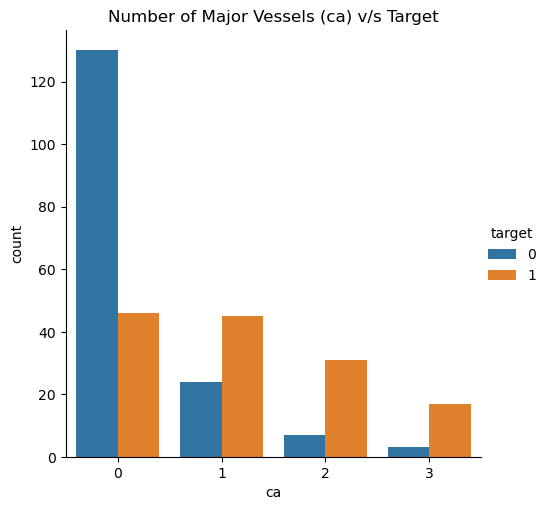

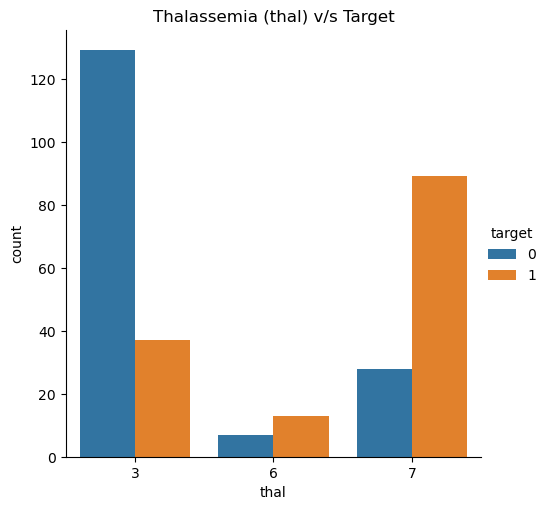

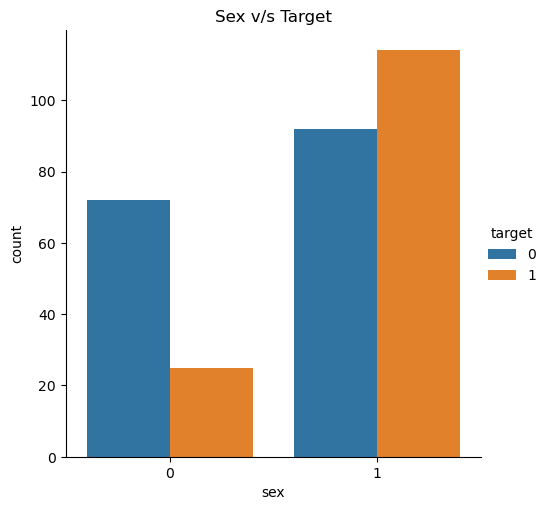

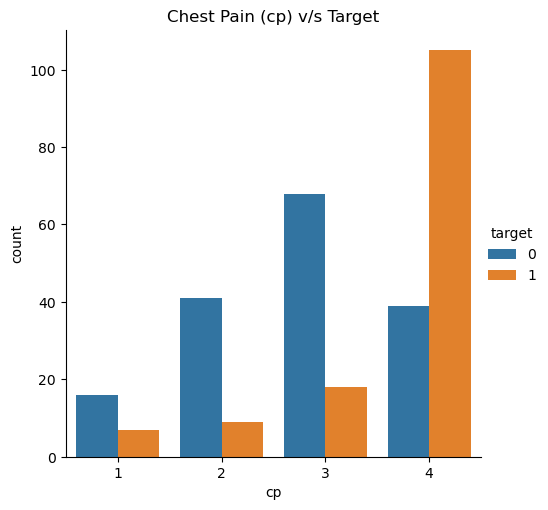

In [3]:
# Display relationship between attributes and heart disease status
sns.catplot(kind = 'count', data = df, x = 'ca', hue = 'target', order = df['ca'].sort_values().unique().astype(int))
plt.title('Number of Major Vessels (ca) v/s Target')
plt.show()

sns.catplot(kind = 'count', data = df, x = 'thal', hue = 'target', order = df['thal'].sort_values().unique().astype(int))
plt.title('Thalassemia (thal) v/s Target')
plt.show()

sns.catplot(kind = 'count', data = df, x = 'sex', hue = 'target', order = df['sex'].sort_values().unique().astype(int))
plt.title('Sex v/s Target')
plt.show()

sns.catplot(kind = 'count', data = df, x = 'cp', hue = 'target', order = df['cp'].sort_values().unique().astype(int))
plt.title('Chest Pain (cp) v/s Target')
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


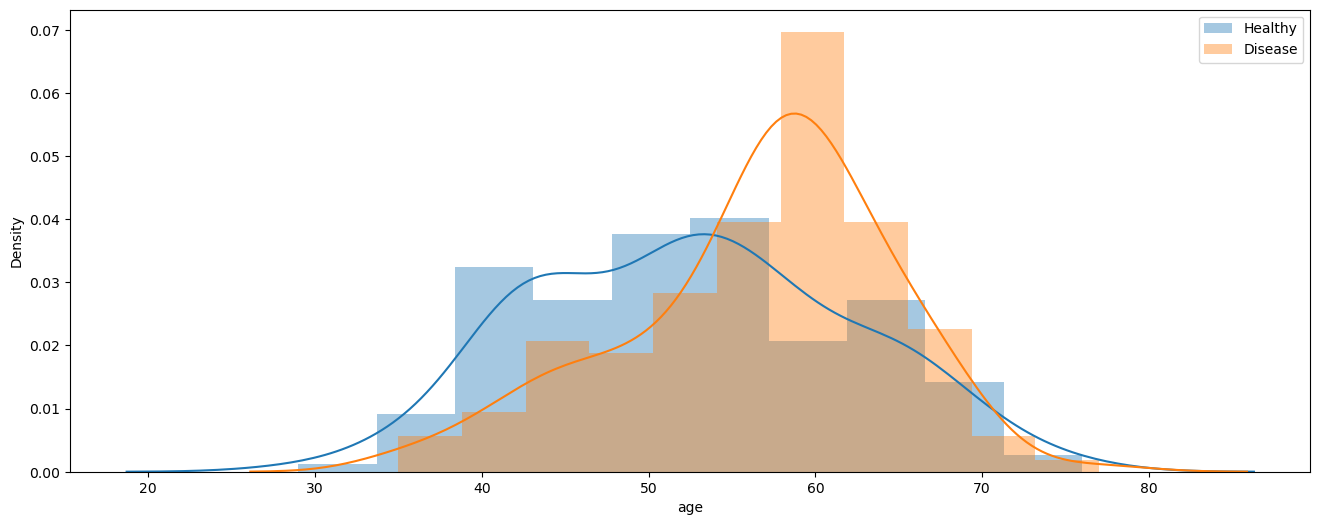

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


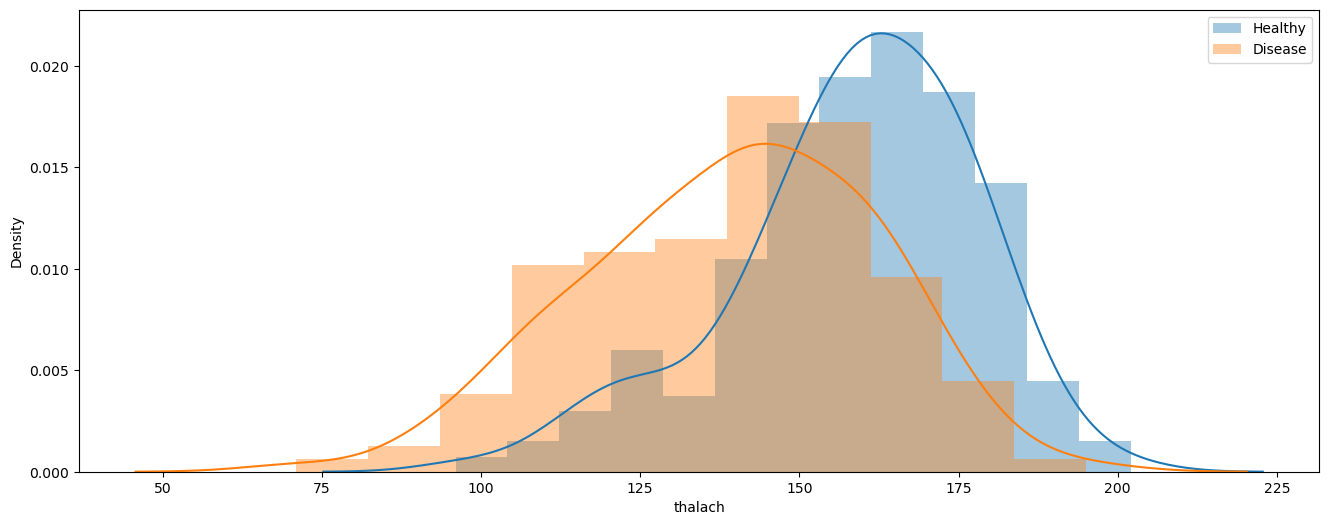

In [4]:
df_healthy = df[df['target'] == 0][['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]
df_disease = df[df['target'] == 1][['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]

# Plot distributions of attributes for healthy or disease
plt.figure(figsize=(16,6))
sns.distplot(df_healthy['age'],label = 'Healthy')
sns.distplot(df_disease['age'], label = 'Disease')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
sns.distplot(df_healthy['thalach'],label = 'Healthy')
sns.distplot(df_disease['thalach'], label = 'Disease')
plt.legend()
plt.show()

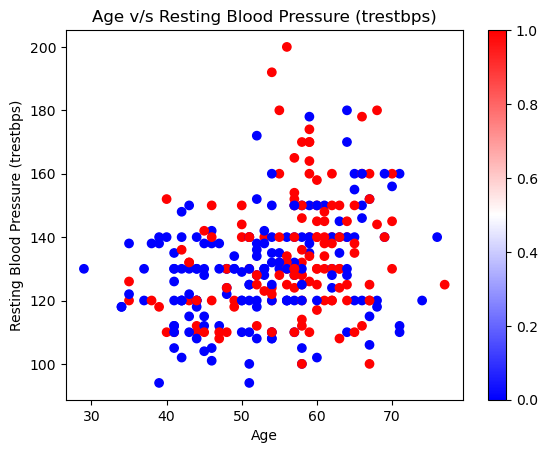

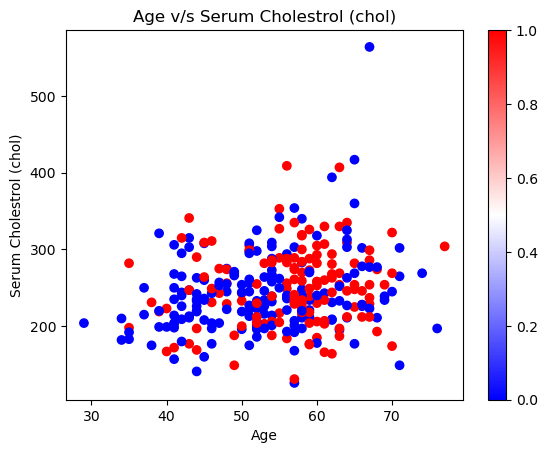

In [5]:
# Explore the relationships between variables
plt.scatter(df['age'], df['trestbps'], c=df['target'], cmap='bwr')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.colorbar()
plt.title('Age v/s Resting Blood Pressure (trestbps)')
plt.show()

plt.scatter(df['age'], df['chol'], c=df['target'], cmap='bwr')
plt.xlabel('Age')
plt.ylabel('Serum Cholestrol (chol)')
plt.title('Age v/s Serum Cholestrol (chol)')
plt.colorbar()
plt.show()

Average Logistic Regression Performance =  0.8250537634408601


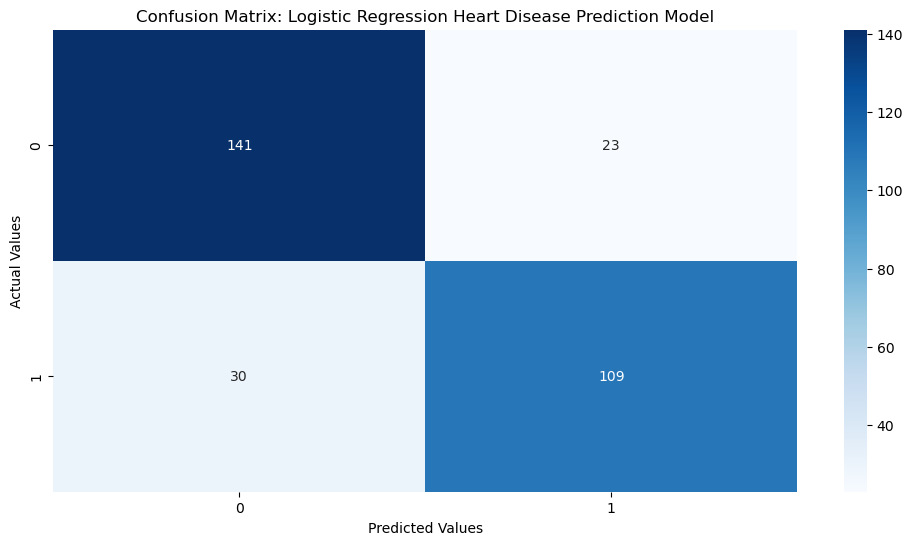

              precision    recall  f1-score   support

 Healthy (0)       0.82      0.86      0.84       164
 Disease (1)       0.83      0.78      0.80       139

    accuracy                           0.83       303
   macro avg       0.83      0.82      0.82       303
weighted avg       0.83      0.83      0.82       303



In [6]:
# Cross Validation on Logistic Regression
kf=KFold(n_splits=10)
LR = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
hd_predict_LR = cross_val_predict(LR,x,hd,cv=kf)
score_LR = cross_val_score(LR,x,hd,cv=kf)
CV_score_LR = score_LR.mean()
print('Average Logistic Regression Performance = ', CV_score_LR)

# Create Confusion Matrix
cm_test_LR = confusion_matrix(hd,hd_predict_LR)

# Plot confusion matrix
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix: Logistic Regression Heart Disease Prediction Model')
sns.heatmap(cm_test_LR, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Display classification report 
classification_report_LR = classification_report(hd,hd_predict_LR,target_names=['Healthy (0)', 'Disease (1)'])
print(classification_report_LR)

AUC Score for Logistic Regression Model =  0.8219643797157395


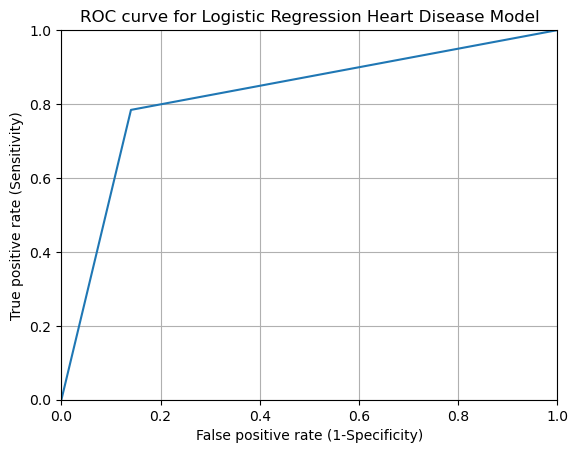

In [7]:
# Plot Receiver Operating Characteristic (ROC) curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(hd,hd_predict_LR)
plt.plot(fpr_LR,tpr_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression Heart Disease Model')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Calculate AUC score
auc_LR = roc_auc_score(hd, hd_predict_LR)
print('AUC Score for Logistic Regression Model = ', auc_LR)

Average Support Vector Machine (SVM) Performance Accuracy =  0.8346994535519124


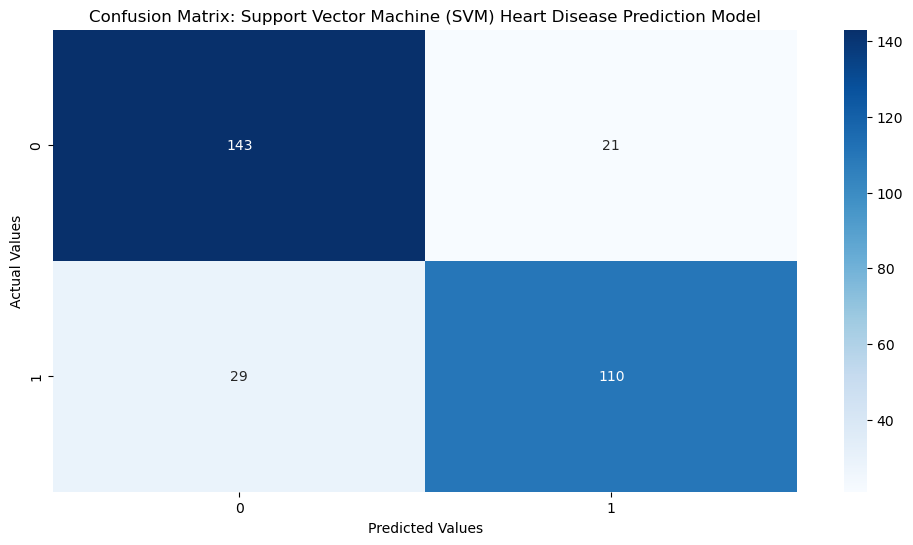

              precision    recall  f1-score   support

 Healthy (0)       0.83      0.87      0.85       164
 Disease (1)       0.84      0.79      0.81       139

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303



In [8]:
# Cross Validation on SVM
SVM = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
kf=KFold(n_splits=5)
hd_predict_SVM = cross_val_predict(SVM,x,hd,cv=kf)
score_SVM = cross_val_score(SVM,x,hd,cv=kf)
CV_score_SVM = score_SVM.mean()
print('Average Support Vector Machine (SVM) Performance Accuracy = ', CV_score_SVM)

# Create Confusion Matrix
cm_test_SVM = confusion_matrix(hd,hd_predict_SVM)

# Plot confusion matrix
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix: Support Vector Machine (SVM) Heart Disease Prediction Model')
sns.heatmap(cm_test_SVM, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Display classification report 
classification_report_SVM = classification_report(hd,hd_predict_SVM,target_names=['Healthy (0)', 'Disease (1)'])
print(classification_report_SVM)

AUC Score for SVM Model =  0.8316590629935077


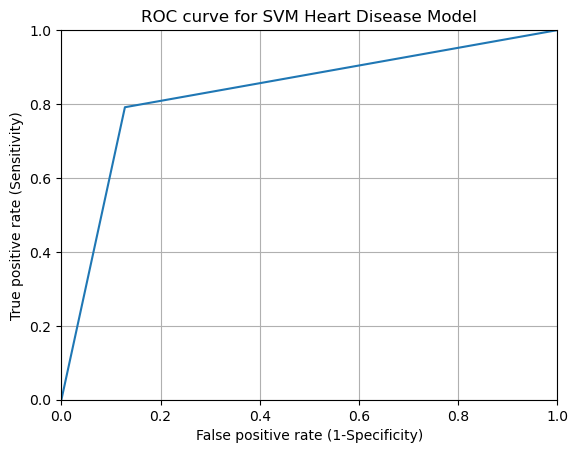

In [9]:
# Plot ROC curve
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(hd,hd_predict_SVM)
plt.plot(fpr_SVM,tpr_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVM Heart Disease Model')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Calculate AUC score
auc_SVM = roc_auc_score(hd, hd_predict_SVM)
print('AUC Score for SVM Model = ', auc_SVM)

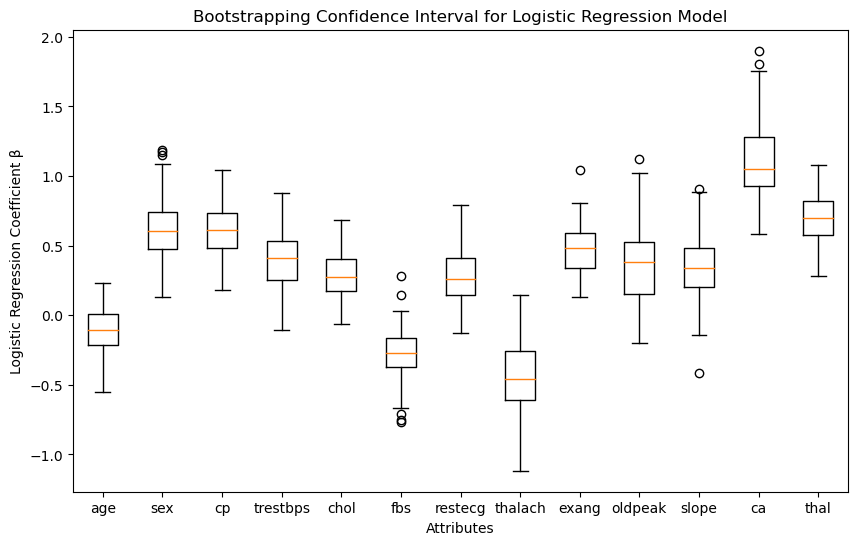

In [10]:
# Bootstrapping
Bootstrap_trials = 100

variable_coef = np.zeros([Bootstrap_trials,len(x[0,:])])

for bootstrapi in range(Bootstrap_trials):
    resamp = resample(range(hd.shape[0]))
    LR_bootstrap = LogisticRegression(max_iter = 1000)

    X_Bootstrap = scale(x[resamp,:])

    LR_bootstrap.fit(X_Bootstrap,hd[resamp])
    variable_coef[bootstrapi,:] = LR_bootstrap.coef_[0]

# Plot confidence interval for variable coefficients
plt.figure(figsize=(10,6))
y_pos = np.arange(len(columns[0:len(x[0,:])]))
plt.boxplot(variable_coef, positions = y_pos)
plt.ylabel('Logistic Regression Coefficient β')
plt.xlabel('Attributes')
plt.title('Bootstrapping Confidence Interval for Logistic Regression Model')
plt.xticks(y_pos, columns[0:len(x[0,:])])
plt.show()

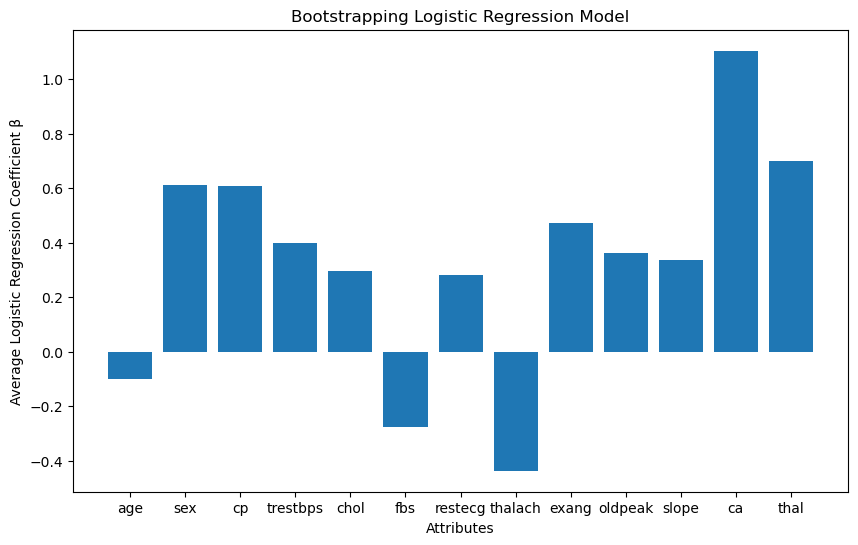

In [11]:
# Average the Bootstrap Coefficients from LR
variable_coef_avg = np.mean(variable_coef, axis=0)  

# Plot Average Variable Coefficients
plt.figure(figsize=(10,6))
plt.bar(columns[0:len(x[0,:])],variable_coef_avg)
plt.ylabel('Average Logistic Regression Coefficient β')
plt.xlabel('Attributes')
plt.title('Bootstrapping Logistic Regression Model')
plt.show()

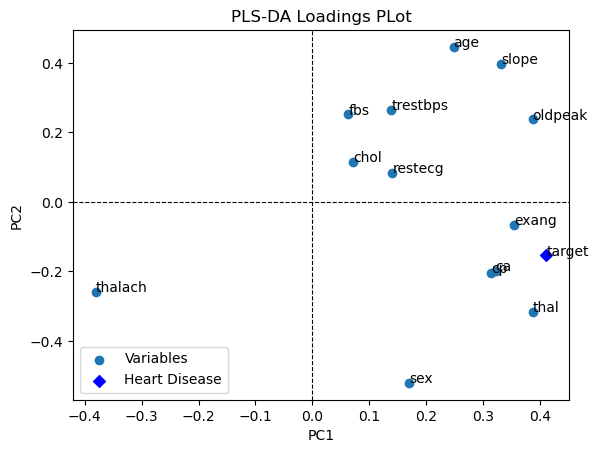

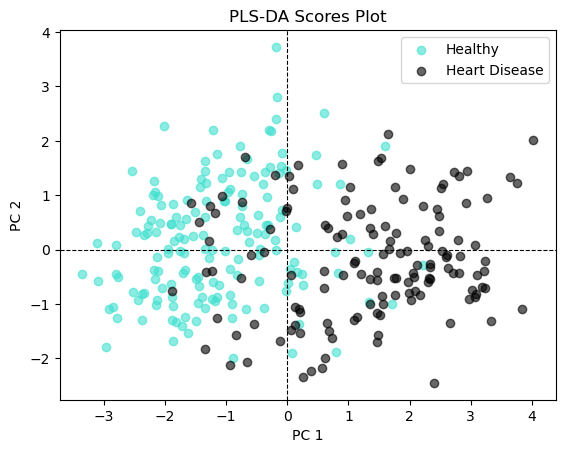

Accuracy of PLSR Model =  0.8481848184818482


In [12]:
# PLS-DA
PLSR = PLSRegression(n_components = 2, scale = 'true')
PLSR.fit(x,hd)

# Determine loadings
PC1_loadings_X = PLSR.x_loadings_[:,0]
PC2_loadings_X = PLSR.x_loadings_[:,1]
PC1_loadings_Y = PLSR.y_loadings_[0,0]
PC2_loadings_Y = PLSR.y_loadings_[0,1]

# Determine scores
PC_scores_X = PLSR.x_scores_

# PLot Loadings plot
plt.scatter(PC1_loadings_X,PC2_loadings_X)      
plt.scatter(PC1_loadings_Y,PC2_loadings_Y, c ='blue', marker = 'D')

# Label variables and target
for i, txt in enumerate(columns[0:len(x[0,:])]):
    plt.annotate(txt,(PC1_loadings_X[i],PC2_loadings_X[i]))
plt.annotate(columns[13],((PC1_loadings_Y,PC2_loadings_Y)))

plt.legend(['Variables', 'Heart Disease'], loc = 'lower left')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLS-DA Loadings PLot')
plt.axhline(0, color='black',linestyle = 'dashed', linewidth=0.8)
plt.axvline(0, color='black',linestyle = 'dashed', linewidth=0.8)
plt.show()

# PLSR scores plot
colors = ['turquoise', 'black']
for color, i, Sample in zip(colors, [0,1], ['Healthy','Heart Disease']):
    plt.scatter(PC_scores_X[hd == i, 0], PC_scores_X[hd == i, 1], color=color, alpha=.6, label=Sample)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PLS-DA Scores Plot')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.axhline(0, color='black',linestyle = 'dashed', linewidth=0.8)
plt.axvline(0, color='black',linestyle = 'dashed', linewidth=0.8)
plt.show()

# Cross Validate PLSR Model
kf=KFold(n_splits=10)
hd_predict_LR = cross_val_predict(PLSR,x,hd,cv=kf)
predict_PLSR = cross_val_predict(PLSR,x,hd,cv=kf)

# Make predicted values 0 or 1
binary_prediction = (predict_PLSR[:,0] > 0.5).astype('uint8')
accuracy = accuracy_score(hd,binary_prediction)
print('Accuracy of PLSR Model = ',accuracy)